# Preparing the dataset for hippocampus segmentation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
from PIL import Image
import math
import glob
%matplotlib inline

## Loading NIFTI images using NiBabel

In [2]:
image_dir = sorted(glob.glob("../data/TrainingSet/images/*.nii.gz"))
label_dir = sorted(glob.glob("../data/TrainingSet/labels/*.nii.gz"))
len(image_dir), len(label_dir)

(263, 262)

In [3]:
image_names = [x.split('/')[-1] for x in image_dir]
label_names = [x.split('/')[-1] for x in label_dir]
print(set(image_names) - set(label_names))

{'hippocampus_118.nii.gz'}


In [4]:
# remove the image that does not have a corresponding label
image_dir.remove("../data/TrainingSet/images/hippocampus_118.nii.gz")

In [5]:
image_names = [x.split('/')[-1] for x in image_dir]
label_names = [x.split('/')[-1] for x in label_dir]
assert image_names == label_names

In [6]:
# Load an image and a segmentation mask into variables called image and label
image = nib.load(image_dir[0]).get_fdata()
label = nib.load(label_dir[0]).get_fdata()
image.shape, label.shape

((35, 51, 35), (35, 51, 35))

In [7]:
def display_volume_slices(img, w, h):
    plot_w = w
    plot_h = h

    # You can play with figsize parameter to adjust how large the images are
    fig, ax = plt.subplots(plot_h, plot_w, figsize=[35,25])

    for i in range(plot_w*plot_h):
        plt_x = i % plot_w
        plt_y = i // plot_w
        if (i < len(img)):
            ax[plt_y, plt_x].set_title(f"slice {i}")
            ax[plt_y, plt_x].imshow(img[i], cmap='gray')
        ax[plt_y, plt_x].axis("off")

    plt.show()

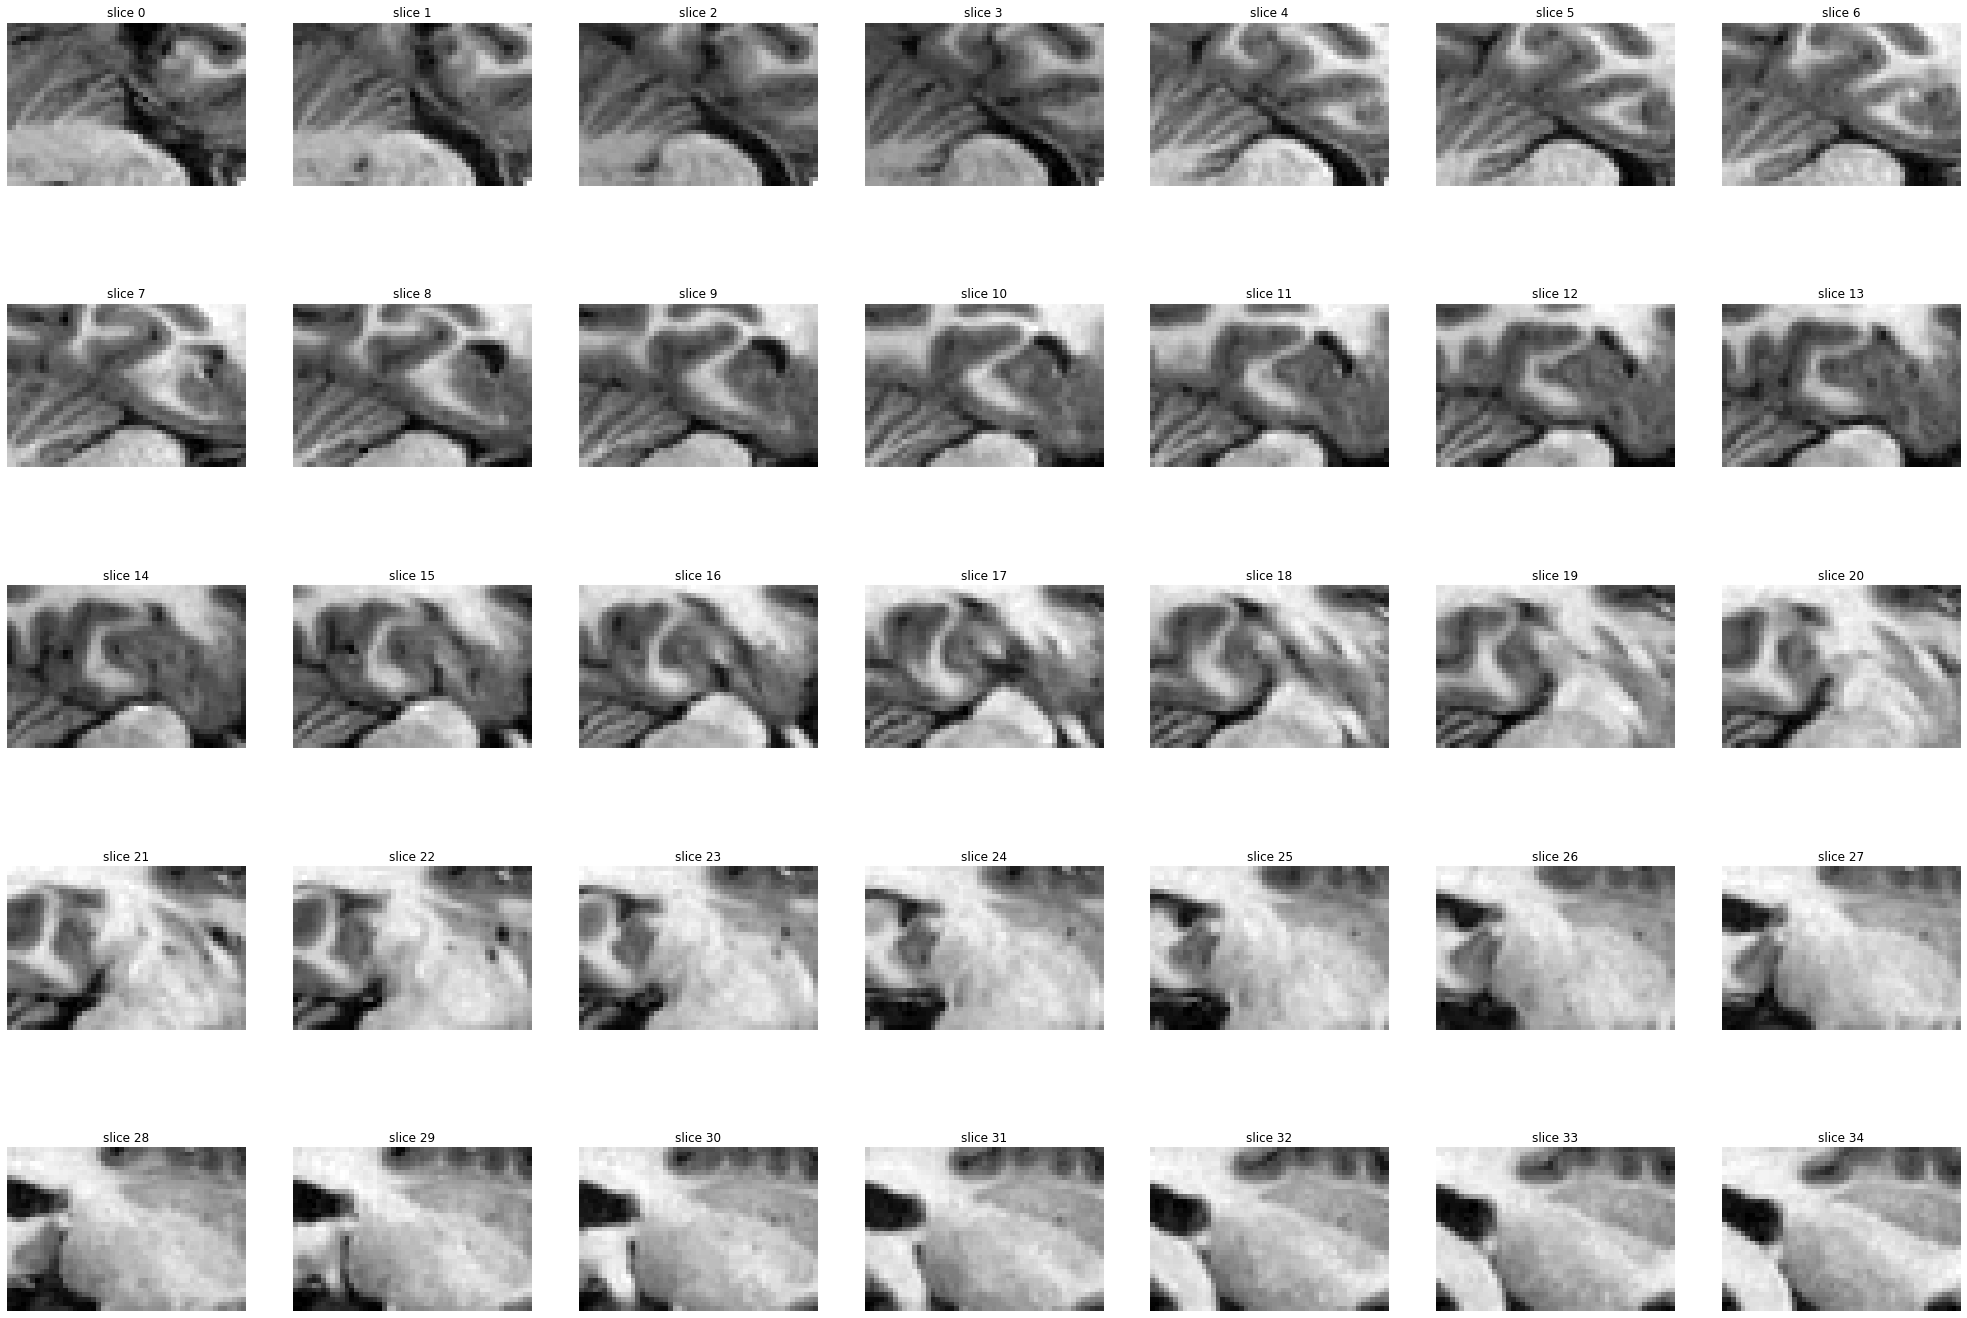

In [8]:
display_volume_slices(np.transpose(image, (2, 0, 1)), 7, 5)

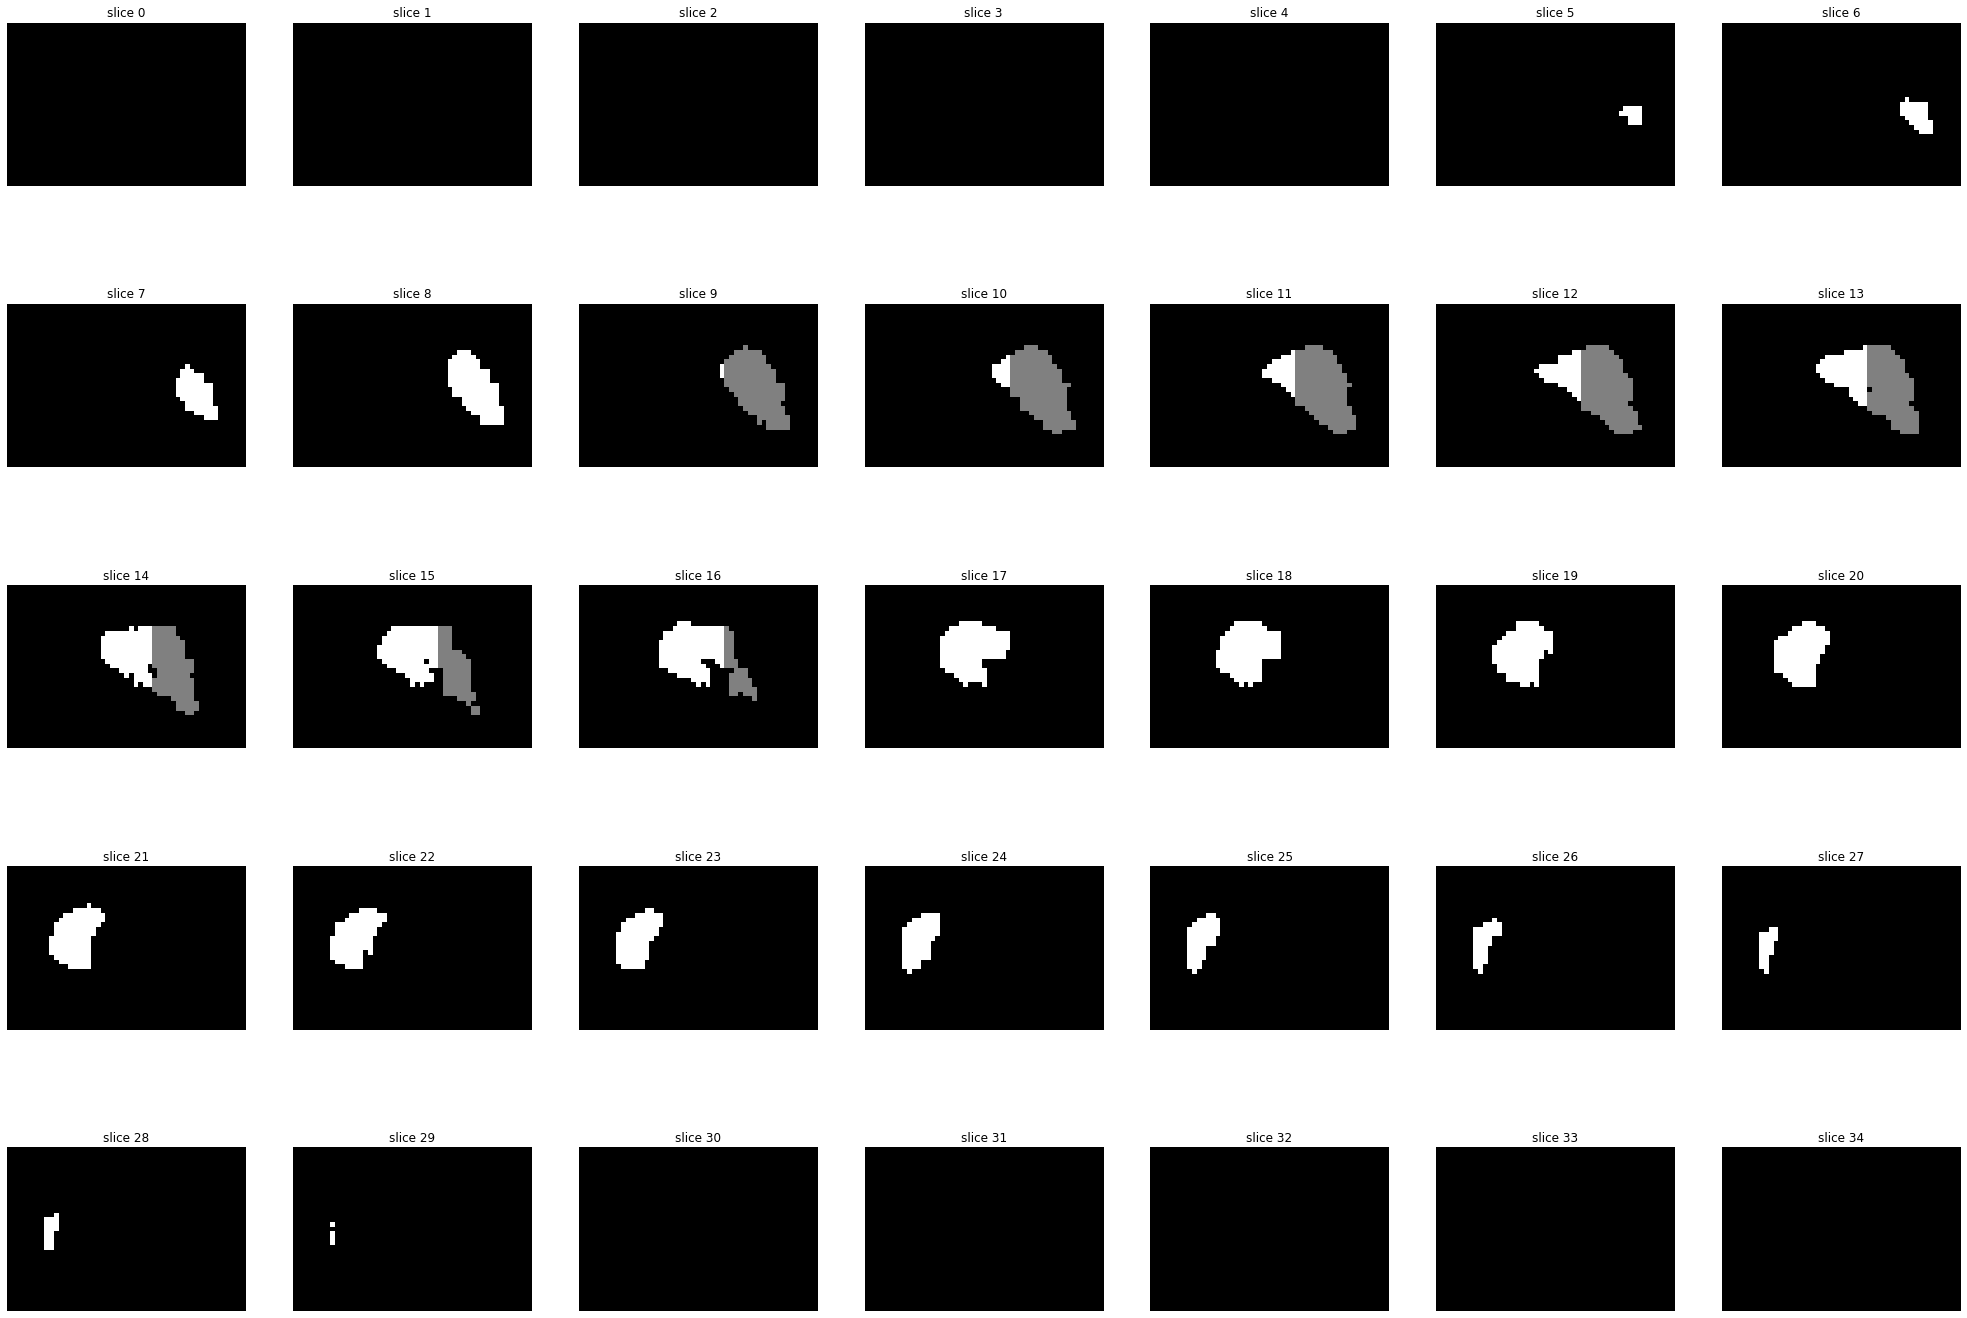

In [9]:
display_volume_slices(np.transpose(label, (2, 0, 1)), 7, 5)

In [10]:
# Stand out suggestion: use one of the simple Volume Rendering algorithms that we've
# implemented in one of our earlier lessons to visualize some of these volumes

## Looking at single image data

In [11]:
# format of our images
img = nib.load(image_dir[0])
img.header_class

nibabel.nifti1.Nifti1Header

Reference for various fields: https://brainder.org/2012/09/23/the-nifti-file-format/

In [12]:
img.header.keys()

['sizeof_hdr',
 'data_type',
 'db_name',
 'extents',
 'session_error',
 'regular',
 'dim_info',
 'dim',
 'intent_p1',
 'intent_p2',
 'intent_p3',
 'intent_code',
 'datatype',
 'bitpix',
 'slice_start',
 'pixdim',
 'vox_offset',
 'scl_slope',
 'scl_inter',
 'slice_end',
 'slice_code',
 'xyzt_units',
 'cal_max',
 'cal_min',
 'slice_duration',
 'toffset',
 'glmax',
 'glmin',
 'descrip',
 'aux_file',
 'qform_code',
 'sform_code',
 'quatern_b',
 'quatern_c',
 'quatern_d',
 'qoffset_x',
 'qoffset_y',
 'qoffset_z',
 'srow_x',
 'srow_y',
 'srow_z',
 'intent_name',
 'magic']

In [13]:
# How many bits per pixel are used?
img.header['bitpix']

array(8, dtype=int16)

In [14]:
# What are the units of measurement?
img.header['xyzt_units']

array(10, dtype=uint8)

In [15]:
# Do we have a regular grid? 
img.header['regular']

array(b'r', dtype='|S1')

In [16]:
# What are grid spacings?
img.header['pixdim']

array([1., 1., 1., 1., 1., 0., 0., 0.], dtype=float32)

In [17]:
# What dimensions represent axial, sagittal, and coronal slices? How do you know?
# The convention is that 
# the second dimension is the sagittal plane
# the third dimension is the coronal plane 
# the forth dimension is the axial plane
img.header['dim']

array([ 3, 35, 51, 35,  1,  1,  1,  1], dtype=int16)

In [18]:
# compute the volume (in mm³) of a hippocampus 
np.sum(nib.load(label_dir[0]).get_fdata() != 0)

2948

## Plotting some charts

The mask has two classes, labeled with values `1` and `2` respectively. Class 1 is the anterior segment of the hippocampus and class 2 is the posterior one. 

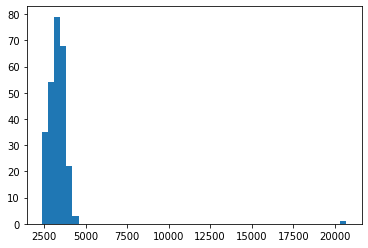

In [19]:
# Plot a histogram of all volumes in the dataset 
# see how the dataset measures against a slice of a normal population represented by the chart below
volume = [np.sum(nib.load(label_dir[i]).get_fdata() != 0) for i in range(len(label_dir))]
plt.hist(volume, bins=50);
plt.show()

<img src="img/nomogram_fem_right.svg" width=400 align=left>

In [20]:
idx = volume.index([x for x in volume if x > 4650][0])

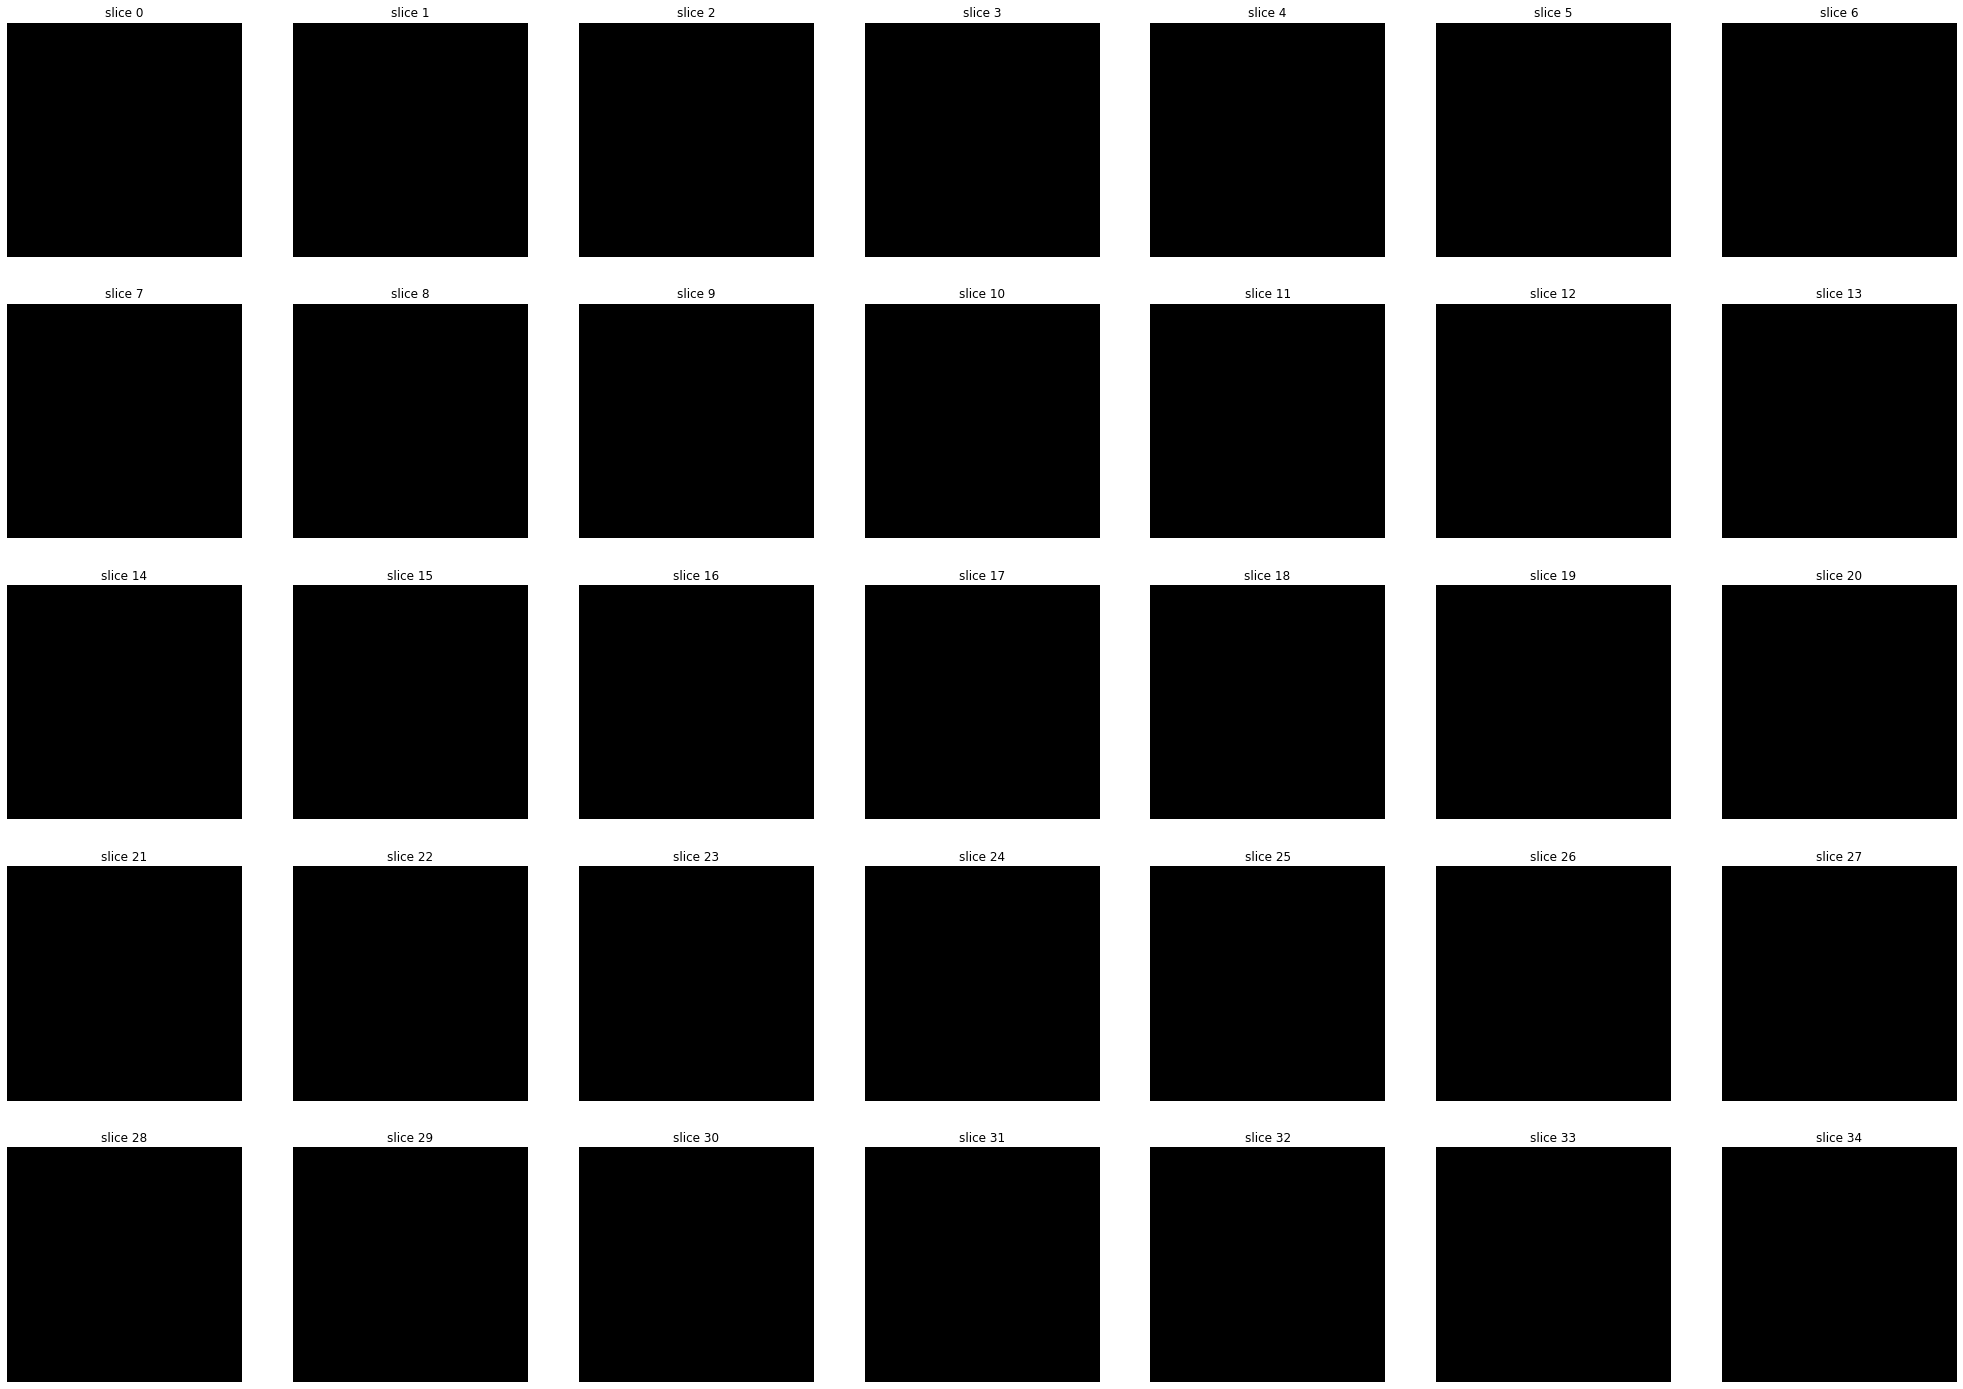

In [21]:
label = nib.load(label_dir[idx]).get_fdata() 
display_volume_slices(np.transpose(label, (2, 0, 1)), 7, 5)

In [22]:
image_dir.pop(idx)
label_dir.pop(idx)
len(image_dir), len(label_dir)

(261, 261)

In [23]:
# TASK: Copy the clean dataset to the output folder inside section1/out. You will use it in the next Section

## Final remarks

Congratulations! You have finished Section 1. 

In this section you have inspected a dataset of MRI scans and related segmentations, represented as NIFTI files. We have visualized some slices, and understood the layout of the data. We have inspected file headers to understand what how the image dimensions relate to the physical world and we have understood how to measure our volume. We have then inspected dataset for outliers, and have created a clean set that is ready for consumption by our ML algorithm. 

In the next section you will create training and testing pipelines for a UNet-based machine learning model, run and monitor the execution, and will produce test metrics. This will arm you with all you need to use the model in the clinical context and reason about its performance!